In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

In [2]:
pathau = r'E:\netData\APS\1 Authors\APS_authorsDCCC2.0.zip'

In [4]:
fau = pd.read_csv(pathau)
fau['type'] = fau['type'].map(dict(zip(['获奖学者','非获奖学者'] , ['laureate' , 'non laureate'])))
fau['treatment'] = fau['type'].map(dict(zip(['laureate' , 'non laureate'] , [1 , 0])))

In [5]:
data = fau[['pub_num','h', 'tc','DC','CC', 'dh', 'ch','type']].copy()

In [6]:
d1 = data[data['type'] == 'laureate'].copy()
d2 = data[data['type'] == 'non laureate'].copy()
d1.index = range(len(d1))
d2.index = range(len(d2))

In [46]:
lst = []
for pubn in d1['pub_num'].values:
    while True:
        if pubn in d2['pub_num'].values:
            break
        else:
            pubn -= 1
    x = d2[d2['pub_num']==pubn].sample(n=1).index[0]
    lst.append(x)

In [47]:
d3 = d2.iloc[lst , :].copy()

In [48]:
d3 = d3.copy()

In [49]:
d3['type'] = 'control 1'

In [50]:
dd = pd.concat([d1,d3])

In [51]:
def draw_bar(dd , va ,label, savepath):
    f, ax = plt.subplots(figsize=(7, 7))
    
    sns.set_theme(style="ticks")
    sns.barplot(data=dd, x="type", y=va , errwidth=3, capsize=.2,palette=['#21618C','#D35400'])
    #plt.ylim(0,60)
    
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.xlabel(label,fontsize = 30)
    plt.ylabel('',fontsize = 0)
    plt.savefig("F:/目前研究项目/APS分析/IPM SDC SCC/fig/fig B2/{}.pdf".format(savepath),bbox_inches = 'tight')

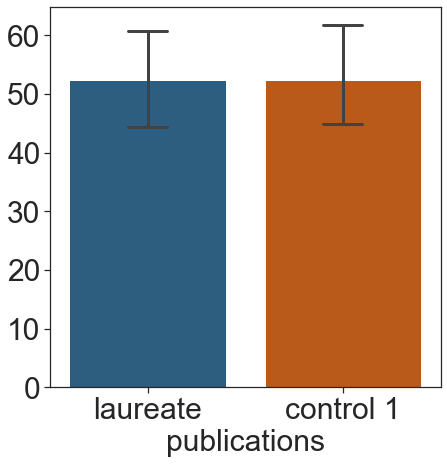

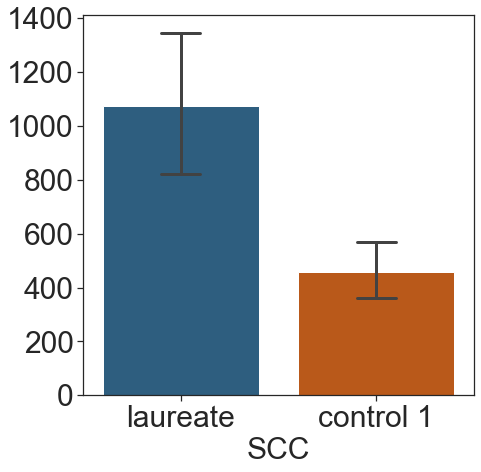

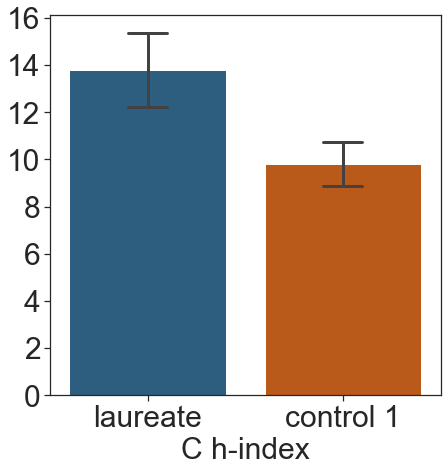

In [52]:
labels = ['publications','SCC','C h-index']
savepath = ['publications1','SCC1','ch1']
valst = [ 'pub_num',  'CC','ch']
for m in range(len(valst)):
    draw_bar(dd ,valst[m], labels[m] , savepath[m])

In [53]:
[scipy.stats.ttest_ind(d1[m].values , d3[m].values,equal_var=False,alternative='two-sided') for m in valst]

[Ttest_indResult(statistic=0.0012788522944935754, pvalue=0.9989806120334662),
 Ttest_indResult(statistic=4.099200726494618, pvalue=6.446682572905568e-05),
 Ttest_indResult(statistic=4.163385789793834, pvalue=4.5566456998850265e-05)]

In [28]:
[scipy.stats.ttest_ind(d1[m].values , d3[m].values,equal_var=False,alternative='two-sided') for m in valst]

[Ttest_indResult(statistic=0.3730219686434694, pvalue=0.709447244620091),
 Ttest_indResult(statistic=-1.4495997323682608, pvalue=0.1483964341150801),
 Ttest_indResult(statistic=-1.6390361162480547, pvalue=0.1024267279306295)]

In [38]:
[scipy.stats.ttest_ind(d1[m].values , d3[m].values,equal_var=False,alternative='two-sided') for m in valst]

[Ttest_indResult(statistic=0.07384565529846643, pvalue=0.9411904661719078),
 Ttest_indResult(statistic=-0.4487553224449301, pvalue=0.6539849724493594),
 Ttest_indResult(statistic=-0.9500889130375937, pvalue=0.3429565839260289)]

In [49]:
# labels = ['publications','h-index','total citations','SDC','SCC','D h-index','C h-index']
# valst = [ 'pub_num', 'h','tc', 'DC', 'CC','dh', 'ch']
# for m in range(len(valst)):
#     draw_bar(dd ,valst[m], labels[m] , valst[m])